# ***ISAT 449 - Emerging Topics in Data Science and Machine Learning***
## **Operation: Smokey The Bear - Using Convolutional Neural Networks to Prevent Wildfires**
### Carter Elliott and Steven Nguyen

# ***Phase 1: Frame The Problem***

## **The Impact of Climate Change on Wildfires**



Over the past decade, the impacts of climate change have produced more intense natural disasters all around the world. One of these locations that has been disproportionately affected by climate change is California. Since 2000, California has been in numerous droughts, with the most severe one happening between December 27, 2011 to March 5, 2019 (https://www.drought.gov/states/california). These severe droughts have baked the California landscape, making them extremely susceptible to wildfires. Unfortunately, the prolonged effects of the droughts and the increased emissions of carbon dioxide in the atmosphere have increased the intensity and duration of wildfires that engulf California each year. Out of the top 10 wildfires that have torched California during its history, 8 of them have happened over the past decade (https://www.fire.ca.gov/media/4jandlhh/top20_acres.pdf). Current advances of technology have allowed new and innovative ways for us to potentially prevent these fires from getting out of control.

## **Convolutional Neural Networks - A Potential Solution**


Convolutional Neural Networks (CNN) are a potential solution for this complex problem. CNN can be used to examine data extracted from images to make predictions, identify trends that cannot be seen by the naked eye, send out notifications, etc. There have been advances in using CNN to combat wildfires; however, they have mainly been in the research/academic realm (https://link.springer.com/article/10.1007/s11042-019-07785-w). 


## **Partnering With Perimeter Platform**

For this project, we plan to design a model that can break through strictly academic/research purposes. We have partnered with Perimeter – a data collection company based in Oakland, California that focuses on pushing out data about natural disasters to first responders (https://perimeterplatform.com/). Carter has worked with this company in the past to create a fire sensor that uses an FLIR camera and Amazon Web Services (AWS) to send thermal images to anywhere around the world using the power of a Raspberry Pi 4. 

## **Operation: Smokey The Bear - "Only YOU Can Prevent Wildfires"**

This project is a continuation of the fire sensor project. The physical components of the sensor have been engineered, as well as the AWS S3 bucket that allows for images to be sent; however, the sensor is not fully functional until there is an onboard analysis. 

Nicknamed, **"Smokey The Bear"**, this CNN will be engineered to detect fires, and their sizes, from thermal images captured from the FLIR Camera currently embedded in the fire sensor. "Smokey The Bear" will be trained using **Supervised Learning** to ensure that the highest possible accuracy can be achieved. Eventually, once embedded into the Raspberry Pi 4 on the fire sensor, "Smokey The Bear" will complete an in-depth analysis on every photo taken within the system itself, saving precious time and resources for first responders - allowing them to respond to these small fires before they become infernos. 

This Google Colab Notebook will explain the creation of "Smokey The Bear".

# ***Phase 2: Define The Objectives***

When designing "Smokey The Bear" we had multiple goals and objectives we wished to acheive:

- Create a CNN from scratch with an accuracy above 90%
- Discover how to create a custom dataset and how to get images
- Review how to load a custom dataset into Google Colab
- Gain an understanding of feature extraction of images
- Get more of a detailed view about the architecture of a CNN and the functions of each layer of a CNN
- Build, Train, Refine, and Evaluate a CNN
- Analyze results, and interpret results




# ***Phase 3: Development Environment Prep***

## **Importing The Essentials**

Before we started importing data into this environment, we needed to import a few different modules to allow for the data to get processed correctly. We used the following modules:
- **TensorFlow (tf):** A VERY powerful open source machine learning platform that comes standard with every Google Colab notebook. (https://www.tensorflow.org/learn)
- **NumPy (np):** An open source module that focuses on numerical computing and data processing with Python. This module will be used heavily when processing images to be used for training, testing, and predicting. (https://numpy.org/)
- **Keras:** A module that works in-tandem with TensorFlow to boost performance, output, and functionality. This module allows for deep learning within the CNN to take place, as well as create custom datasets within TensorFlow. (https://keras.io/about/)
- **Pillow (PIL):** A module that allows for images to be processed within the environment. In addition to processing images, this module also allow for image manipulation (rotation, resizing, cropping, etc.). (https://pillow.readthedocs.io/en/stable/handbook/overview.html)

In [ ]:
#Import Modules
import tensorflow as tf
import numpy as np
from tensorflow import keras

#Import Pillow Image Tools
import PIL
import PIL.Image

## **Display Model Specifications**

Once the modules were successfully imported, we wrote 2 different print statements. These serve as ways to tell the user two basic specifications of the the model: the version of TensorFlow and number of GPUs being used by the model. Google Colab is great because we have remote access to Google's suite of GPUs, but if we had one embedded into our computers, it would draw power from that one instead of Google's.

In [ ]:
#Display Version of TensorFlow
print("TensorFlow Version:", tf.__version__)

#Print Number of GPUs being Used
print("The Number of GPUs Available is: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow Version: 2.7.0
The Number of GPUs Available is:  0


We are currently working in the most current version of TensorFlow (2.7.0) and we are using 1 GPU (if we had no GPUs attached, this would be a 0). Now that we have imported all of the modules we need, have the most up to date version of TensorFlow, and have some extra computing power, it's time to get started!

# ***Phase 4: Getting The Data***

## **Data Requirements**

We had to adhere to the following requirements when selecting data that we would use for "Smokey The Bear":
- Our dataset must contain at least 3,000 images
  - Images in the data set must be thermal images
  - Images must be captured using an FLIR Thermal Camera
  - Images must be high quality
- The dataset must be free and available for public use

## **The FLAME Dataset**

### **Purpose** 

We decided to use the Fire Luminoscity Airborn-based Machine Learning Evaluation (FLAME) Dataset to train "Smokey The Bear". This dataset was created by 5 student researchers from Northern Arizona University, along with a member of the US Air Force Research Laboratory, with the purpose of training machine learning models embedded in unmannded aerial vehicles (UAVs) to recognize fires from above. The data was collected during a controlled burn, consisting of multiple fires of various sizes, in the mountains of Northern Arizona. Large pine trees surround the fires, along with a blanket of fresh snow on the ground. 

### **The Dataset**

The FLAME Dataset contains 10 different repositories wiht a large amount of data over a variety of different forms of media:
1. 16 minute, 6 second raw video of all fires using Zenmuse X4S camera with a capture rate of 29 frames per second
2. 16 minute, 6 second raw video of one fire using Zenmuse X4S camera with a capture rate of 29 frames per second
3. 1.5 minute thermal video of all fires using "White-Hot" mode (grayscale) on a FLIR Vue Pro R thermal camera with a capture rate of 30 frames per second
4. 5 minute thermal video of all fires using "Green-Hot" mode (greenscale) on a FLIR Vue Pro R thermal camera with a capture rate of 30 frames per second
5. **25 minute thermal video of all fires using "Fusion" mode (color) on a FLIR Vue Pro R thermal camera with a capture rate of 30 frames per second**
6. 17 minute raw video from a DJI Phantom 3 camera with a capture rate of 30 frames per second
7. 39,375 images (254 x 254 pixels) used for training
8. 8, 617 images (254 x 254 pixels) used for testing
9. 2,003 frames (3480 x 2160 pixels) used for fire segmentation
10. 2,003 frames (3480 x 2160 pixels) used for truth mask frames of fire segmentation

The full dataset can be found here: https://ieee-dataport.org/open-access/flame-dataset-aerial-imagery-pile-burn-detection-using-drones-uavs


## **Creating the Image File System For Usage**

We used the thermal video from Repository 5 to collect our data; however, the data collection process was slightly tedius. "Smokey The Bear" works on IMAGE data, not VIDEO data, meaning we had to find a way to extract the images from the video. We employed the following method to gather all the images needed for "Smokey The Bear":



### **Step 1. Extracting The Images**

The first step was extracting the images from the raw video in repository 5. To do this, we employed the following steps:

1. Download the video from Repository 5
2. Download "VideoProc Converter" software to extract images (https://www.videoproc.com/)
3. Uploaded a 5 minute segment of the raw thermal video into the program (via "Snapshot" tool)
  - 5 - 10 minutes
  - 12 - 17 minutes
4. Set the parameters of photo extraction
  - JPEG file format
  - 640 x 512 pixels
  - Picure Count of 30 (number of images extracted per frame)

This process resulted in two new folders being created, *5_min_to_10_min* and *12_min_to_17_min*, that contained the images extracted from those segments of the thermal video.

### **Step 2. Sorting The Images and Zipping The Files**

Once the images were extracted from the video, we then had to manually sort the images based on their features. Four repositories were created to sort the images, each with hundreds of images in each one. After manual sorting, each repository contained the following number of images:
- **no_fire:** 1494 images
- **small_fire:** 396 images
- **large_fire:** 894 images
- **multiple_fires:** 612 images

We then put these repositories in one main repository, **cnn_dataset**, and zipped it into a *.zip* file. We now have a dataset that contains 3,396 thermal images that can be fed into the model! 

## **Uploading the** ***.zip*** **File**

Now that we have a full dataset, we then had to upload it into this Google Colab notebook so that it can be used to train "Smokey The Bear". To complete this task, we employed the following procedure to safely, and effectively, upload the data from our computer. Explainations of each step can be found below the code cell.

**IMPORTANT**: The file **MUST** be named "**cnn_dataset**"

**NOTE:** The following tutorial was followed to incorporate Step 4 into the code cell: https://www.youtube.com/watch?v=V0q0SQmsqQw


In [ ]:
#Step 1. Allow Google Colab to Access Files
from google.colab import files

#Step 2. Names Dataset "data"
data = files.upload()

#Step 3. Confirms Upload
for fn in data.keys():
  print('\nUser uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(data[fn])))

#Step 4. Unzip Data
from zipfile import ZipFile

with ZipFile('cnn_dataset.zip', 'r') as unzipped_data:
  unzipped_data.extractall('/content/data')

print('\nThe data was successfully unzipped! See the unzipped data below:')

#Step 5. Confirm that Data was Unzipped
!ls '/content/data'

#Step 6. Message If Folder Isn't Showing:
print('\nIf you cannot see the folder in the directory list, hit the directory refresh button (middle button)')

#Step 7. Delete the Original .zip File
!rm cnn_dataset.zip
print('\nThe original zip file has been deleted to free up space within the environment.')

Saving cnn_dataset.zip to cnn_dataset.zip

User uploaded file "cnn_dataset.zip" with length 46103444 bytes

The data was successfully unzipped! See the unzipped data below:
cnn_dataset  __MACOSX

If you cannot see the folder in the directory list, hit the directory refresh button (middle button)

The original zip file has been deleted to free up space within the environment.


### **Step-by-Step Code Explaination**

**Step 1:**  Allows Google Colab to import files from outside sources, such as the local files from the hard drive

**Step 2:** The files that were uploaded from Step 1 are now under the alias "data"

**Step 3:** Runs a For Loop through the uploaded file that confirms the name of the file that the user uploaded, along with the file size (in bytes)

**Step 4:** Imports the "ZipFile" module then opens the *cnn_dataset.zip* file in Read Mode. All of the from the zip file is extracted, then a confirmation statement is printed once the extraction is done

**Step 5:** Prints all of the information located in the "data" folder

**Step 6:** Prints a message to the user telling them what to do if they cannot see the data in the directory list

**Step 7:** Deletes the original .zip file that was uploaded to free up space in the development environment, then tells the user the file was deleted

## **Creating The Dataset**

Now that the images are uploaded into the development environement, we then had to create the dataset that we were going to use to train "Smokey The Bear". It was not as simple as uploading the images because they are still individual images and they need to be organized in a way that can be recognized by TensorFlow and Keras. The following steps were taken to create the dataset within this notebook:

**NOTE**: The following cells were created with the help of a TensorFlow tutorial that can be found here: https://www.tensorflow.org/tutorials/load_data/images

### **Step 1: Establish the Path of the Dataset**

The path to the data must be established so that "Smokey The Bear" knows where the data is. We accomplished this by importing pathlib (a Python module) and established the path to data under as the variable "dataset". We then created a new variable, "fire_data", to establish the path using pathlib. This made the path compatible with the following code cells.

In [ ]:
#Establish the Path in Pathlib
import pathlib
dataset = '/content/data/cnn_dataset'
fire_data = pathlib.Path(dataset)

### **Step 2: Confirm The Number of Images in the Dataset**

Next, we created a variable that will count the number of images in dataset. To do this, we created the ***image_count*** variable that is responsible for counting the images. It does this by creating a list that contains all of the images in the ***fire_data*** variable that are in **.jpg** format. It then saves the length (number of instances where images are in .jpg format) of that list in the variable ***image_count***. We then created a print statement that would print the ***image_count*** variable. We ended up with 3,396 images in our dataset.

In [ ]:
#Figure Out Number of Images in Dataset
image_count = len(list(fire_data.glob('*/*.jpg')))
print(image_count)

3396


### **Step 3: Create The Main Batch Dataset**

Since the pathway to the images was now defined, we now could create the dataset that would contain ALL of the images. We created a **Batch Dataset**, which is a dataset that is organized in batches. The sizes of these batches can be customized. For this project, we established a batch size of 10,000 so the images can be split into smaller batches from one main batch. We also decided that the images will be 64 x 64 pixels to keep the data size of the images small while not compromising the data of the images.

In [ ]:
#Define Parameters
batch_size = 10000
img_height = 64
img_width = 64

### **Step 4: Create The Training Batch Dataset from Main Dataset**

We then used the power of Keras to create a Training Set. This Training Set uses the directory established in the ***fire_data*** variable from Step 1, and uses 75% of the data from the main batch dataset (25% is used for the Validation Set). We specidied it as a training subset of the main batch, with a seed of 123 so that the training set will be randomized on every run of this code cell. It also uses the same image sizes established in Step 3.

In [ ]:
#Create the Training Dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    fire_data,
    validation_split = 0.25,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width), 
    batch_size=batch_size
)

Found 3396 files belonging to 4 classes.
Using 2547 files for training.


### **Step 5: Create The Validation (Testing) Batch Dataset from Main Dataset**

We used the same technique in Step 4 to create the Validation Set. The Validation Set (also known as the Testing Set) contains the 25% of the data left over from the split. We specified it as the validation subset of the main batch dataset, along with giving it a seed of 123. In addition, it uses the same image sizes created in Step 3.

In [ ]:
#Create the Validation Dataset
testing_set = tf.keras.utils.image_dataset_from_directory(
    fire_data,
    validation_split = 0.25,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width), 
    batch_size=batch_size
)

Found 3396 files belonging to 4 classes.
Using 849 files for validation.


### **Step 6: Establish The Class Names**

The class names needed to be established for later use. We did this by creating a variable, ***class_names***, that extracted the class names from the Training Batch Set. It then printed the class names in a Python list.

The Class Names correlate to the following:
- Class 0 = "large_fire"
- Class 1 = "multiple_fires"
- Class 2 = "no_fire"
- Class 3 = "small_fire"

In [ ]:
#Create The Class Names
class_names = training_set.class_names
print(class_names)

['large_fire', 'multiple_fires', 'no_fire', 'small_fire']


# ***Phase 5: Exploratory Data Analysis***

## **Step 1: Plot Images**


To test that our method of creating the Training Batch Dataset and Validation Batch Dataset was successful, we plotted some images from the Training Batch Dataset. We first imported the ***matplotlib*** dependencies from the pyplot module, which allows data to be plotted using Python. We stored these dependencies under the alias "***plt***". To create the various plots, we created a nested For Loop that created a 3 x 3 grid of subplots consisting of the first 9 images, and their labels, from the Training Batch Dataset.

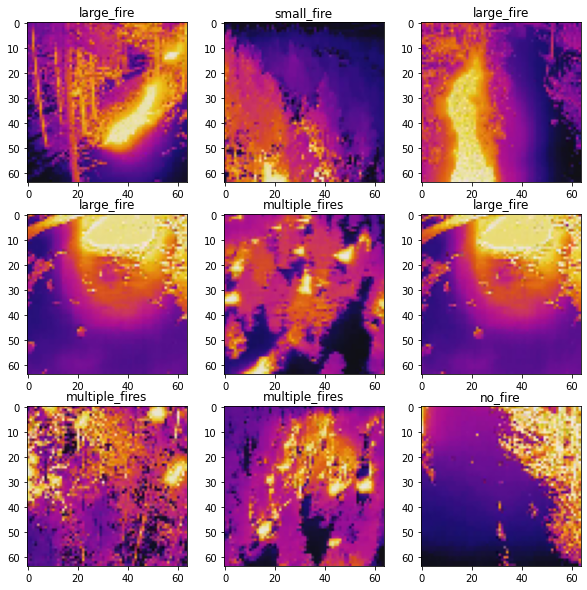

In [ ]:
#Import MatPlotLib
import matplotlib.pyplot as plt

#Plot First 9 Images from Training Dataset
plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

This test confirmed that our method of dataset creation worked, and that the images were uploaded and split correctly. Not only that, but the labels were also correctly paired with their respective images.

## **Step 2: Image Analysis**

After plotting the first 9 images, we got a chance to analyze some of the major attributes of each image and why they were classified the way they were. Our qualitative analysis yielded the following results:
- No Fires
  - Funky shapes and outlines due to trees
  - Majority of the image was either orange, pink, purple, or a combination of the three
  - Clearly defined "cold spots" - areas of the images that are deep purple or black
  - No bright spots concentrated bright spots
- Small Fires
  - Small, concentrated bright spot
  - Mostly circular, but can have irregular shapes
  - Small heat aura
  - Majority of image has outlines of trees and/or cold spots
- Large Fires
  - Feature a very clear bright spot
  - Clear shapes and figures
  - Visable flame tails/flame shape
  - Large heat aura
  - Flame takes up significant portion of image
- Multiple Fires
  - Multiple small, concentrated brightspots per image
  - Clear shapes for fires, but not as defined as large fires
  - Irregular shapes for environment
  - Majority of image is made of cold spots
  - Tiny heat auras per fire

We can infer that these are the features that "Smokey The Bear" will use to predict what kind of fire is assosiated with a certain image.

# ***Phase 6: Prepare The Data***

One of the caveots of the fire sensor is that it is only compatible with **grayscale images**. Since the current images are in an RGB format,"Smokey The Bear" would not be properly trained to work with the fire sensor if we used the current images. Therefore, we must grayscale the images before feeding the to "Smokey The Bear". Before we could grayscale the images, we first needed to convert the images in the batch datasets to NumPy arrays. The steps taken to complete that objective are described below:

## **Converting The Batch Datasets to NumPy Format**

### **Step 1: Convert the Training and Testing Batch Sets**

The conversion of the data to NumPy arrays was quite simple and straight forward. 

We created a For Loop that focused on the images and labels in the Training Batch Dataset exclusively. In this loop, we created two variables: "***x_train***" for the images and "***y_train***" for the labels. The only difference is the name of the variables. Similarly, we used ***x_test** for the images and ***y_test*** for the labels in the Testing Set. Each of these variables stored the converted data after being converted via the "*np.array*" command - which converts and form of data into NumPy arrays.

We then wrote 4 separate print statment blocks that printed what the datatypes of ***x_train***, ***y_train***, ***x_test***, ***y_test*** were, as well as the shape of the variables. After running these statements, we determined that all of the training images and labels were NumPy arrays. Not only that, but there were 2,547 images that were 64 x 64 pixels with 3 color channels intact in ***x_train***. In addioion, there were 849 images that were 64 x 64 pixels with 3 color channels in ***x_test***.


In [ ]:
#Convert To NumPy Arrays (Training Set)
for image_batch, labels_batch in training_set:

  #Convert the Training Dataset into NumPy Arrays
  x_train = np.array(image_batch)
  y_train = np.array(labels_batch)

  #Confirm the Datatype and Shapes of "x_train"
  print("x_train:")
  print("Image Class Type:", type(x_train))
  print("Images Shape:", x_train.shape)

  #Confirm the Datatype and Shapes of "y_train"
  print("\ny_train:")
  print("Labels Class Type:", type(y_train))
  print("Images Shape:", y_train.shape)


#Convert To NumPy Arrays (Testing Set)
for image_batch, labels_batch in testing_set:
  
  #Convert Testing Set into NumPy Arrays
  x_test = np.array(image_batch)
  y_test = np.array(labels_batch)

  #Confirm the Datatype and Shapes of "x_test"
  print("\nx_test:")
  print("Image Class Type:", type(x_test))
  print("Images Shape:", x_test.shape)

  #Confirm the Datatype and Shapes of "y_test"
  print("\ny_test:")
  print("Label Class Type:", type(y_test))
  print("Label Shape:", y_test.shape)

x_train:
Image Class Type: <class 'numpy.ndarray'>
Images Shape: (2547, 64, 64, 3)

y_train:
Labels Class Type: <class 'numpy.ndarray'>
Images Shape: (2547,)

x_test:
Image Class Type: <class 'numpy.ndarray'>
Images Shape: (849, 64, 64, 3)

y_test:
Label Class Type: <class 'numpy.ndarray'>
Label Shape: (849,)


### **Step 2: Convert The Image and Label Datatypes**

Now that the images have been converted to NumPy arrays, we needed to refine the images and labels further to make them compatable with "Smokey The Bear". Recall that when the original batch dataset was created, the images and labels were in the "*unit8*" datatype. *Unit8* datatypes are only compatable for **INTEGERS** from 0 to 255 that are unsigned (https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html). This proves to be a problem when normalizing of the images, which divides all the data by a number specified by the user. Normalization is IMPERATIVE for machine learning to speed up the process.

To do this, we had to convert the images to the "*float32*" datatype and labels to "*int64*. The "*float32*" datatype converts data values to simple floats (decimals), while the "*int64*" datatype converts data to signed integers in the range of -9.2 quadrillion to 9.2 quadrillion (https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html).

The conversion process was quite simple. We rewrote the ***x-train***, ***y_train***, ***x_test***, and ***y_test*** variables as copies of themselves, except with their new datatypes. In addition, since ***x_train*** and ***x_test*** are now decimal-based, we normalized the data associated with those variables.

In [ ]:
#Changing the Image Type from "unit8" to "float32"
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#Changing the Label Type from "unit8" to "int64"
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

### **Step 3: Plotting Training Set Images**

Much like before, we plotted the first nine images from the newly converted Training Dataset to confirm that everything worked properly. We used the same code struture as earlier in the notebook.

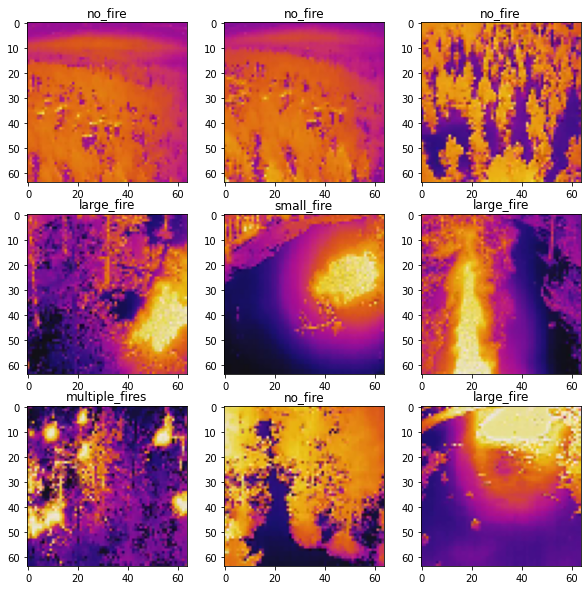

In [ ]:
#Display First 9 Images of Training Set (To Verify Image and Label Match-Up)

#Change Size of Images in Plot
plt.figure(figsize=(10, 10))

#For Loop to Plot Images
for i in range(9):  
  
  #Define Subplot
  plt.subplot(3, 3, i+1)

  #Plot Raw Image Pixel Data
  plt.imshow(x_train[i])

  #Display Labels on Images
  plt.title(class_names[y_train[i]])

#Show Images
plt.show()

The results show that the conversion was successful! We did not need to print images from the Testing Set since it followed the same code structure as the Training Set.

## **Grayscale Images of Training/Testing Dataset**

Now that the data is formatted correctly, we could move on to the final step of preparing the data: grayscaling the entire dataset. Grayscaling the images was simple and straight forward.

It's important to note that grayscaling only happens for the images; no need to grayscale the labels. We first employed a TensorFlow command that converts all images from a given argument to grayscale. We used "***x_train**" and "***x_test***" as our arguments, and saved the results as "***grayscale_x_train***" and "***grayscale_x_test***".

Since this command uses TensorFlow, we were careful to convert the results to NumPy arrays. We did this by rewriting the "***grayscale_x_train***" and "***grayscale_x_test***" variables as NumPy versions of themselves. To confirm the transformation, we printed the shapes of the variables to be sure. The shapes of each variable had a color channel of 1, which meant that the images were grayscaled.

However, to be extremely sure, we printed the first image of the Training Set so that we could get a visual. After plotting the image, it was clear that we were successful in our efforts!

The Shape of the NumPy Training Set is:  (2547, 64, 64, 1)
The Shape of the NumPy Testing Set is:  (849, 64, 64, 1)


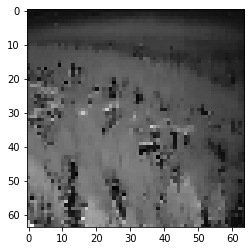

In [ ]:
#Grayscale Training and Testing Sets
grayscale_x_train = tf.image.rgb_to_grayscale(x_train[:])
grayscale_x_test = tf.image.rgb_to_grayscale(x_test[:])

#Convert to NumPy Arrays and Check Shapes
grayscale_x_train = grayscale_x_train.numpy()
print('The Shape of the NumPy Training Set is: ', grayscale_x_train.shape)

grayscale_x_test = grayscale_x_test.numpy()
print('The Shape of the NumPy Testing Set is: ', grayscale_x_test.shape)

#Display the First Image of the Training Set
gray_image = tf.image.rgb_to_grayscale(x_train[1])
plt.imshow (tf.squeeze(gray_image), cmap = 'gray')

# ***Phase 7: Model The Data***

We ran a variety of different tests to determine which "Smokey The Bear" model would work best. 

We started out by created binary models that only classified "no_fire" and "fire" to understand how all the layers of the convolutional model worked with each other. The "winner" of the binary models was then used as a baseline for the trinary models that classified "no_fire", "fire", and "multiple_fires". Multiple trinary models were run, each of them with increasing accuracy and decreasing losses. Much like with the binary models, the "winner" of the trinary models was used as a baseline for the main models that classified all 4 classes: "no_fire", "small_fire", "large_fire", and "multiple_fires". While we cannot put all of the models in this notebook, a link to the spreadsheet containing all of the data from the binary and trinary models can be found here: https://docs.google.com/spreadsheets/d/14GAvady1-Ao20qM3-EMf-2xQ3vZ-pDyS5zsBr4kTkq8/edit?usp=sharing

We ran 6 different "Smokey The Bear" models, each with slight changes in the parameters that would drastically affect the outcome. Each of their parameters and results are listed below:

**NOTE**: The models in the following cells were tested earlier in the project's lifecycle, and some metrics may not match what is seen in future cells. As such, these models (and their results) are for comparison and discussion purposes ONLY.

### **Model 1**

In [ ]:
#Model 1
model_1 = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (6, 6), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #3
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), activation = 'relu'),

    #Pooling Layer #3
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(128, activation = 'relu'),

    #Dense Layer #2
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dense Layer #3
    tf.keras.layers.Dense(32, activation = 'relu'),

    #Dense Layer #4
    tf.keras.layers.Dense(16, activation = 'relu'),

    #Dense Layer #5
    tf.keras.layers.Dense(8, activation = 'relu'),

    #Dense Layer #6
    tf.keras.layers.Dense(4, activation = 'softmax'),

  ])

In [ ]:
#Compile The Model
model_1.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model 1 had 3 Convolutional Layers with there being 64 filters in CL 1, 32 filters in CL 2, and 16 fitlers in CL 3. There was only Zero Padding enabled in CL 1. It was trained with a batch size of 12, 5 different epochs, and had a validation split of 0.1. It resulted with a final accuracy of 96.11%, loss of 0.1217, and overfitting.

### **Model 2**

In [ ]:
#Model 2
model_2 = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (6, 6), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #3
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), activation = 'relu'),

    #Pooling Layer #3
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(128, activation = 'relu'),

    #Dense Layer #2
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dense Layer #3
    tf.keras.layers.Dense(32, activation = 'relu'),

    #Dense Layer #4
    tf.keras.layers.Dense(16, activation = 'relu'),

    #Dense Layer #5
    tf.keras.layers.Dense(8, activation = 'relu'),

    #Dense Layer #6
    tf.keras.layers.Dense(4, activation = 'softmax'),

])

In [ ]:
#Compile The Model
model_2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model 2 had 3 Convolutional Layers with there being 32 filters in CL 1, 64 filters in CL 2, and 16 fitlers in CL 3. There was only Zero Padding enabled in CL 1. It was trained with a batch size of 12, 5 different epochs, and had a validation split of 0.1. It resulted with a final accuracy of 95.17%, loss of 0.1819, and slight overfitting.

### **Model 3**

In [85]:
#Model 3
model_3 = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (6, 6), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(128, activation = 'relu'),

    #Dense Layer #2
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dense Layer #3
    tf.keras.layers.Dense(32, activation = 'relu'),

    #Dense Layer #4
    tf.keras.layers.Dense(16, activation = 'relu'),

    #Dense Layer #5
    tf.keras.layers.Dense(8, activation = 'relu'),

    #Dense Layer #6
    tf.keras.layers.Dense(4, activation = 'softmax'),

])

In [86]:
#Compile The Model
model_3.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model 3 had 2 Convolutional Layers with there being 64 filters in CL 1, and 32 layers in CL 2. There was only Zero Padding enabled in CL 1. It was trained with a batch size of 12, 5 different epochs, and had a validation split of 0.1. It resulted with a final accuracy of 96.94%, loss of 0.0965, and no overfitting.

### **Model 4**

In [ ]:
#Model 4
model_4 = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (6, 6), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(128, activation = 'relu'),

    #Dense Layer #2
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dense Layer #3
    tf.keras.layers.Dense(32, activation = 'relu'),

    #Dense Layer #4
    tf.keras.layers.Dense(16, activation = 'relu'),

    #Dense Layer #5
    tf.keras.layers.Dense(8, activation = 'relu'),

    #Dense Layer #6
    tf.keras.layers.Dense(4, activation = 'softmax'),

])

In [ ]:
#Compile The Model
model_4.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model 4 had 2 Convolutional Layers with there being 32 filters in CL 1, and 64 layers in CL 2. There was only Zero Padding enabled in CL 1. It was trained with a batch size of 12, 5 different epochs, and had a validation split of 0.1. It resulted with a final accuracy of 93.40%, loss of 0.1865, and slight overfitting.

### **Model 5**

In [ ]:
#Model 5
model_5 = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (6, 6), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #3
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), activation = 'relu'),

    #Pooling Layer #3
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(128, activation = 'relu'),

    #Dense Layer #2
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dense Layer #3
    tf.keras.layers.Dense(32, activation = 'relu'),

    #Dense Layer #4
    tf.keras.layers.Dense(16, activation = 'relu'),

    #Dense Layer #5
    tf.keras.layers.Dense(8, activation = 'relu'),

    #Dense Layer #6
    tf.keras.layers.Dense(4, activation = 'softmax'),

])

In [ ]:
#Compile The Model
model_5.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model 5 had 3 Convolutional Layers with there being 64 filters in CL 1, 32 layers in CL 2, and 16 layers in CL 3. There was Zero Padding enabled in CL 1 and CL 2. It was trained with a batch size of 12, 5 different epochs, and had a validation split of 0.1. It resulted with a final accuracy of 93.29%, loss of 0.2006, and overfitting.

### **Model 6**

In [89]:
#Model 6
model_6 = tf.keras.Sequential([
      
    #Convolutional Layer #1
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (6, 6), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (64, 64, 1)),

    #Pooling Layer #1
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #2
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'),

    #Pooling Layer #2
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Convolutional Layer #3
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (1, 1), activation = 'relu'),

    #Pooling Layer #3
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),

    #Flatten Output
    tf.keras.layers.Flatten(),

    #Dense Layer #1
    tf.keras.layers.Dense(128, activation = 'relu'),

    #Dense Layer #2
    tf.keras.layers.Dense(64, activation = 'relu'),

    #Dense Layer #3
    tf.keras.layers.Dense(32, activation = 'relu'),

    #Dense Layer #4
    tf.keras.layers.Dense(16, activation = 'relu'),

    #Dense Layer #5
    tf.keras.layers.Dense(8, activation = 'relu'),

    #Dense Layer #6
    tf.keras.layers.Dense(4, activation = 'softmax'),

])

In [90]:
#Compile The Model
model_6.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model 6 had 3 Convolutional Layers with there being 32 filters in CL 1, 64 layers in CL 2, and 16 layers in CL 3. There was Zero Padding enabled in CL 1 and CL 2. It was trained with a batch size of 12, 5 different epochs, and had a validation split of 0.1. It resulted with a final accuracy of 95.88%, loss of 0.1130, and slght overfitting.

### **Analysis**
After looking at the results of all 6 models, it was clear that we began to see some models that performed better than others. Our main metrics used for comparison were the accuracy, loss, and the amount of overfitting present in the Accuracy and Loss graphs. Based on those metrics, here is the order of the models from best to worst:

- **Model 3 (Best)**: Had an extremely low loss rate (0.0965) with a high accuracy (96.94%). Also had no overfitting at all on the graphs, meaning the model was learning the trends properly. 
- **Model 6**: Had a slightly higher loss rate (0.1130) and a slightly smaller accuracy (95.88%). Very slight overfitting trends proved this model was effective, even with 3 convolutional layers in place.
- **Model 2**: Significantly higher loss rate (0.1819) with a slightly smaller accuracy (95.17%). The high accuracy, along with with only slight overfitting, put Model 2 high on the list despite the higher loss value.
- **Model 4**: Slightly higher loss rate (0.1865) with a significantly lower accuracy (93.40%). These factors, along with a slight overfitting put this model in the lower half of the list.
- **Model 1**: Had a very low loss (0.1217) and a very high accuracy (96.11%), but had major overfitting issues. This meant that the model was not functioning properly, thus it is towards the bottom of the list.
- **Model 5 (Worst)**: The high loss (0.2006), coupled with the lowest accuracy (93.29%) and major overfitting made this model the worst model that was tested.

# ***Phase 8: Fine-Tune Models***

Based on the analysis, we concluded that our top 2 models (Model 3 and Model 6) were the "winners" of the general model comparison. We decided to put these models head to head to see which model would be chosen as "Smokey The Bear".

## **Model 3: Deeper Analysis**

### **Model Summary**

To begin the competition, we isolated Model 3 into its own environment and ran the notebook from the beginning. We then printed out the Model Summary to get a better understanding of the model. The summary can be seen below:

In [ ]:
#Model Summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        2368      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 31, 32)        8224      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

The model summary shows that the model has 10,592 trainable parameters from all of the Convolutional Layers. It then sends these trainable parameters (and their biases) to the Dense Layers, where the data is then analyzed and filtered through 6 Dense Layers, with the final layer being the output layer. In total, there were 943,356 parameters that were used in this model.

### **Train The Model**

We then had to train the model with all of the Training and Testing Data intact. The code used to run the model can be seen below:

In [87]:
#Train The Model
EPOCHS = 5
model_3_history = model_3.fit(
    grayscale_x_train, y_train,
    batch_size = 12, epochs = EPOCHS, validation_split = 0.1, verbose = 1,
)

Epoch 1/5
191/191 [==============================] - 18s 92ms/step - loss: 1.0970 - accuracy: 0.5144 - val_loss: 0.8348 - val_accuracy: 0.6392
Epoch 2/5
191/191 [==============================] - 17s 91ms/step - loss: 0.6010 - accuracy: 0.7714 - val_loss: 0.4253 - val_accuracy: 0.8549
Epoch 3/5
191/191 [==============================] - 17s 90ms/step - loss: 0.3458 - accuracy: 0.8874 - val_loss: 0.3233 - val_accuracy: 0.8902
Epoch 4/5
191/191 [==============================] - 17s 90ms/step - loss: 0.2163 - accuracy: 0.9328 - val_loss: 0.1843 - val_accuracy: 0.9529
Epoch 5/5
191/191 [==============================] - 17s 90ms/step - loss: 0.1662 - accuracy: 0.9450 - val_loss: 0.1836 - val_accuracy: 0.9255


### **Make A Prediction**

One of the easiest ways to see if the model worked is to have it make a prediction. We used Image 500 from the Testing Set as our predition image. The results can be seen here:

The model predicts the following image to be a member of Class 0 which translates to large_fire.


Text(0.5, 1.0, 'large_fire')

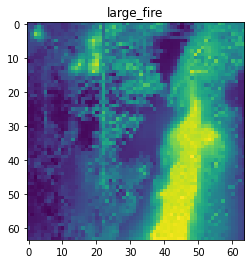

In [88]:
#Make Prediction
model_3_prediction = model_3.predict(grayscale_x_test[500].reshape(1, 64, 64, 1))
np_predict = np.argmax(model_3_prediction)
print("The model predicts the following image to be a member of Class {}".format(np_predict) + " which translates to {}".format(class_names[np_predict]) + '.')

#Show Image
plt.imshow(grayscale_x_test[500].reshape(64, 64))
plt.title(class_names[np_predict])

As seen above, Model 3 was able to correctly predict the image!

## **Model 6: Deeper Analysis**

### **Model Summary**

Just like with Model 3, we isolated Model 6 into its own environment and ran the notebook from the beginning. We printed out the model summary to get a better idea of how the model is functioning. The results can be seen below:

In [ ]:
#Model Summary
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        1184      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 16)        1040      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 16)        

The model summary shows that the model has 10,480 trainable parameters from all of the Convolutional Layers, which is slightly less than Model 3. It then sends these trainable parameters (and their biases) to the Dense Layers, where the data is then analyzed and filtered through 6 Dense Layers, with the final layer being the output layer. 

In total, there were 152,716 parameters that were used in this model, about 6 times fewer parameters than Model 3. This could be because there are more Convolutional Layers being used, therefore data is getting more refined before going to the Dense Layers.

### **Train The Model**

We then had to train Model 6 the same way we trained Model 3. The code used to train the model is the exact same code used to train Model 3.

In [91]:
#Train The Model
EPOCHS = 5
model_6_history = model_6.fit(
    grayscale_x_train, y_train,
    batch_size = 12, epochs = EPOCHS, validation_split = 0.1, verbose = 1,
)

Epoch 1/5
191/191 [==============================] - 15s 74ms/step - loss: 0.9820 - accuracy: 0.6038 - val_loss: 1.1068 - val_accuracy: 0.5490
Epoch 2/5
191/191 [==============================] - 14s 74ms/step - loss: 0.6849 - accuracy: 0.7277 - val_loss: 0.6030 - val_accuracy: 0.8000
Epoch 3/5
191/191 [==============================] - 14s 74ms/step - loss: 0.4770 - accuracy: 0.8216 - val_loss: 0.4503 - val_accuracy: 0.8392
Epoch 4/5
191/191 [==============================] - 14s 73ms/step - loss: 0.2964 - accuracy: 0.8997 - val_loss: 0.2129 - val_accuracy: 0.9412
Epoch 5/5
191/191 [==============================] - 14s 73ms/step - loss: 0.1813 - accuracy: 0.9428 - val_loss: 0.2286 - val_accuracy: 0.9294


### **Make A Prediction**

To keep things consistent, we used Image 500 from the Testing Set to be our prediction image. The results can be seen here:

The model predicts the following image to be a member of Class 0 which translates to large_fire.


Text(0.5, 1.0, 'large_fire')

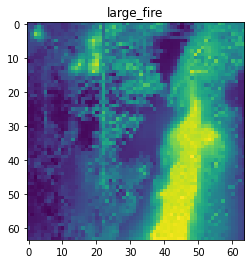

In [77]:
#Make Prediction
model_6_prediction = model_6.predict(grayscale_x_test[500].reshape(1, 64, 64, 1))
np_predict = np.argmax(model_3_prediction)
print("The model predicts the following image to be a member of Class {}".format(np_predict) + " which translates to {}".format(class_names[np_predict]) + '.')

#Show Image
plt.imshow(grayscale_x_test[500].reshape(64, 64))
plt.title(class_names[np_predict])

Model 6 was able to correctly classify the image as well!

# ***Phase 9: Present The Solution***

## **Comparing The Models**

We know that both models are able to correclty predict an unknown image, but how do we know which model is the best one? We used a two different evaluation techniques to compare the models:

### **Accuracies With Test Set**

One simple way to compare the models is to see how accurate they were with the Testing Set. We did this by employing the code below for each model:

In [99]:
#Test the Accuracy of Model 3
print("Model 3 Accuracy")
test_loss, test_acc = model_3.evaluate(grayscale_x_test, y_test, verbose = 1)
print('The Test Set Loss for Model 3 is: {0:0.4f} and the Test Set Accuracy for Model 3 is: {1:0.4}%'.format(test_loss, 100*test_acc))

#Test the Accuracy of Model 6
print("\nModel 6 Accuracy")
test_loss, test_acc = model_6.evaluate(grayscale_x_test, y_test, verbose = 1)
print('The Test Set Loss for Model 6 is: {0:0.4f} and the Test Set Accuracy for Model 6 is: {1:0.4}%'.format(test_loss, 100*test_acc))

Model 3 Accuracy
27/27 [==============================] - 2s 62ms/step - loss: 0.1608 - accuracy: 0.9541
The Test Set Loss for Model 3 is: 0.1608 and the Test Set Accuracy for Model 3 is: 95.41%

Model 6 Accuracy
27/27 [==============================] - 1s 49ms/step - loss: 0.1578 - accuracy: 0.9470
The Test Set Loss for Model 6 is: 0.1578 and the Test Set Accuracy for Model 6 is: 94.7%


### **Accuracy and Loss Graphs**

#### **Model 3**

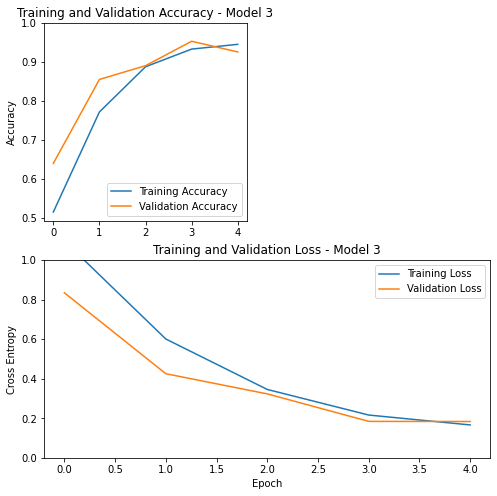

In [105]:
#Import MatPlotLib
import matplotlib.pyplot as plt

#Define Variables (Model 3)
acc = model_3_history.history['accuracy']
val_acc = model_3_history.history['val_accuracy']

loss = model_3_history.history['loss']
val_loss = model_3_history.history['val_loss']

#Plot Training vs. Validation Accuracy (Model 3)
plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy - Model 3')

#Plot Training vs. Validation Loss (Model 3)
plt.subplot(2, 1, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss - Model 3')
plt.xlabel('Epoch')
plt.show()

#### **Model 6**

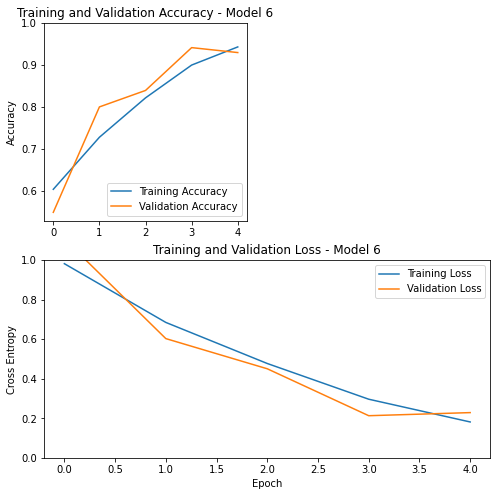

In [106]:
#Define Variables (Model 6)
acc = model_6_history.history['accuracy']
val_acc = model_6_history.history['val_accuracy']

loss = model_6_history.history['loss']
val_loss = model_6_history.history['val_loss']

#Plot Training vs. Validation Accuracy (Model 6)
plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1)
plt.plot(acc, label = "Training Accuracy")
plt.plot(val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy - Model 6')

#Plot Training vs. Validation Loss (Model 6)
plt.subplot(2, 1, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss - Model 6')
plt.xlabel('Epoch')
plt.show()

## **Analysis**

### **Accuracies**

Both of these models had an extremely high accuracy rate, with Model 3's being slightly higher than Model 6's. Model 3 had an accuracy of 95.41% while Model 6 had an accuracy of 94.70% - both of which are extrordinary! 

However, while Model 3 had the higher accuracy rate, Model 6 had the lower loss score. The loss score of Model 3 was 0.1608, while that of Model 6 was 0.1578.

Accuracies are a great starting point, but don't tell the whole story of which model performed better. For that, we looked at the next statistic.

### **Training/Validation Accuracy and Loss Graphs**

These graphs determined which model is better, and there was a clear winner here. 

Model 3's Accuracy curves were relatively smooth, with some crossover at Epoch 0 and halfway through Epoch 3. In addition, Model 3's Loss curves were very smooth, with only a single crossover about 75% of the way through Epoch 3. Lastly, the Accuracy and Loss lines did not deviate too far from each other, signifying that there was almost no overfitting of the model.

Model 6's Accuracy curves were less smooth. the Training Accuracy was smooth, but the Validation Accuracy was all over the palce with crossovers happening halfway through Epoch 0 and at the end of Epoch 3. Not only that, but the Validation Accuracy line gets very far away from the Training Accuracy line at times. The Loss curves tell the same story: a smooth descent for the training loss and a jaged descent for the validation loss. Finally, while the ends of the plots for Accuracy and Loss end close together, they do not end as close as they did with Model 3, signifying that there was slight overfitting.

## **Choosing A Winner**

After running both Model 3 and Model 6, making predictions, and analyzing the results, the model that will become "Smokey The Bear" is **MODEL 3**.

We decided on Model 3 not only because the accuracy was high and it was able to make predictions easily, but also because there was barely any overfitting. This meant that the model was not over-learning the data (memorizing trends instead of learning them). In addition, the ascent for the Accuracy and descent for the Loss were very smooth when compared to Model 6, meaning that the model was learning at a more steady rate.

We feel confident that this model will work well when it is one day incorporated into the Fire Sensor, and it will be responsible for saving many lives in the future.

# ***Phase 10: Launch The ML System***

## **Obtaining The Right Files**

In order to properly launch the system online, we needed to extract a few different files from the model itself. Our goal was to deploy the model on Netlify.com

**NOTE**: To complete this step, we used the following guide that can be found here: https://towardsdatascience.com/deploying-a-simple-machine-learning-model-into-a-webapp-using-tensorflow-js-3609c297fb04

### **Saving the File into an HDF5 Format**

The current model must be saved before it can be converted into the correct format to be run on the web. To do this, we had to save the model into its own file:

In [108]:
#Save model into a Variable and Save Model
smokey_the_bear_deployed = "./stb.h5"
model_3.save(smokey_the_bear_deployed)

### **Install TensorFlow.js**

Now that the file has been saved, it can be converted into a JavaScript file that can be used in an online framework (HTML 5):

In [109]:
#Import TensorFlow JS
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 3.0 MB/s 


### **Convert the HDF5 File**

Now that TensorFlow.js was installed into the notebook, we could then convert the HDF5 file into the correct format. The we used to do that can be seen here:

In [110]:
#Convert using TensorFlowjs
!tensorflowjs_converter --input_format=keras '/content/stb.h5' ./

After this happened, 2 new files were created: "***group1-shard1of1.bin***" and "***model.json***". Both of these files are crucial for the deployment of our model. We downloaded them, zipped them with an ***index.html*** file, and uploaded it to Netlifly. The link to the Netlify Website can be found here: https://lucid-lichterman-67ff6a.netlify.app/

## **A Quick Note About Deployment...**

Unfortunately, we could not get the model to properly deploy onto Netlify. However, theoretically, the user would upload a grayscale image of a fire, then that image would be put into the model and used for a prediction. While we could not get deployment to work, we still feel that our model did its job well, and maybe it will get it deployed one day!

A copy of our development log can be found here: https://drive.google.com/file/d/1GBhoUpNsl5jTPBfObxrHR1sgi5RLkjoh/view?usp=sharing

